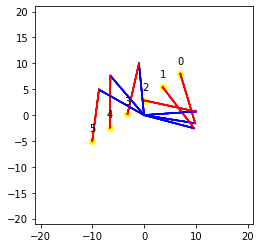

In [162]:
## Robot Link Length:
L = 10.0 #L = L1 = L2

# Initial position
x0, y0 = 7, 8

# Desired position
xT, yT = -10, -5
#No. of intermediate steps
steps     = 5
# Inverse Kinematics Function call
IK(x0, y0, xT, yT, L, steps, flag = "ED")

In [161]:
def IK(x0, y0, xT, yT, L, steps, flag):
    """
    The IK problem will be solved sequentially for each point in the intPoint list with the initial-
    point as the first element and the destination point as the next element. 
    """
    from math import sqrt, sin, cos, atan2
    import matplotlib.pyplot as plt
    if sqrt(x0**2 + y0**2) <= 2*L and sqrt(xT**2 + yT**2) <= 2*L :
        # Equation of line
        slope     = (yT - y0)/(xT - x0)
        intercept = (slope * x0) - y0

        line      = lambda t: slope * (x0 + (xT - x0)*t/steps) - intercept

        # intermediate points
        intPoints = [[(x0 + (xT - x0)*t/steps), line(t), flag] for t in range(steps + 1)]

        intPoint= list(map(list, zip(*intPoints)))
        plt.scatter(intPoint[0], intPoint[1], color = 'yellow')
        for x,y in zip(intPoint[0], intPoint[1]):

            label = "{:d}".format(intPoint[0].index(x))

            plt.annotate(label, # this is the text
                         (x,y), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='center') # horizontal alignment can be left, right or center
            RParam = list(map(IKMap, intPoints))
    else:
        print("Invalid Points")

In [138]:
def IKMap(point, L = 10):
    from math import sqrt, sin, cos, atan2
    import matplotlib.pyplot as plt
    x, y, flag= point
    # From Eqn (7)
    A, B, C = x**2 + y**2, 2*x*L, 2*y*L
    if flag == "EU":
        num,den = C + sqrt(B**2 + C**2 - A**2), A + B
    elif flag == 'ED':
        num,den = C - sqrt(B**2 + C**2 - A**2), A + B
    else: 
        print("Invalid Flag")
    # From Eqn (9)
    theta1  = 2 * atan2(num, den)

    # From Eqn (11)    
    theta2  = atan2(y - (L*sin(theta1)), x - (L*cos(theta1))) - theta1
    #------------- Plotting---------------#
    p0 = [0, 0]
    p1 = [L*cos(theta1), L*sin(theta1)]
    p2 = [L*cos(theta1) + L*cos(theta1 + theta2), 
          L*sin(theta1) + L*sin(theta1 + theta2)]

    l1 = list(map(list, zip(*[p0, p1])))
    l2 = list(map(list, zip(*[p1, p2])))
    
    # Plotting the Points
    plt.gca().set_aspect("equal")
    plt.xlim([-2*L-1, 2*L+1])
    plt.ylim([-2*L-1, 2*L+1])

    plt.plot(l1[0], l1[1], color = 'Blue')
    plt.plot(l2[0], l2[1], color = 'Red')
    plt.grid()